$\def\*#1{\mathbf{#1}}$
$\DeclareMathOperator*{\argmax}{arg\,max}$
# Data Types

## Imports

In [11]:
import matplotlib as mpl
# pyplot : Provides a MATLAB-like plotting framework
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Data Matrix

The data set is represented by a $n \times d$ **data matrix** :

$$
D = 
\begin{pmatrix}
  x_{1,1} & x_{1,2} & \cdots & x_{1,d} \\
  x_{2,1} & x_{2,2} & \cdots & x_{2,d} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_{n,1} & x_{n,2} & \cdots & x_{n,d} 
\end{pmatrix}
$$

* The *i*-th **row** refers, depending on the application, to an *entity*, *instance*, **record**, *transaction*, *alternative*,...

$$\*x_i = (x_{i1}, x_{i1}, \ldots, x_{id})$$

* The *j*-th **column** refers to an *attribute*, **feature**, *dimension*, *criteria*,... 

$$X_j = (x_{1j}, x_{2j}, \ldots, x_{nj})$$

$$
D = 
\left(
\begin{array}{c|cccc}
        & X_1 & X_2 & \cdots & X_d\\
        \hline
  \*x_1 & x_{1,1} & x_{1,2} & \cdots & x_{1,d} \\
  \*x_2 & x_{2,1} & x_{2,2} & \cdots & x_{2,d} \\
  \vdots & \vdots  & \vdots  & \ddots & \vdots  \\
  \*x_n & x_{n,1} & x_{n,2} & \cdots & x_{n,d} 
\end{array}
\right)
$$

## Iris Data Set

 | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | Type of iris plant |
 | ----------------- | ---------------- | ----------------- | ---------------- | ------------------ |
 | 5.1               | 3.5              | 1.4               | 0.2              | Setosa             |
 | 4.8               | 3.0              | 1.4               | 0.3              | Setosa             |
 | 6.0               | 3.4              | 4.5               | 1.6              | Versicolor         |
 | 6.8               | 3.0              | 5.5               | 2.1              | Virginica          |
 | 6.7               | 3.1              | 5.6               | 2.4              | Virginica          |

In [2]:
# import scikit-learn : Machine Learning in Python
from sklearn import datasets

iris = datasets.load_iris()

print(iris.feature_names)

print(iris.target_names)

print()

instances = [0, 45, 85, 112, 140]

print(iris.target[instances])

print()

print(iris.data[instances])

print()

print(type(iris.data))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']

[0 0 1 2 2]

[[ 5.1  3.5  1.4  0.2]
 [ 4.8  3.   1.4  0.3]
 [ 6.   3.4  4.5  1.6]
 [ 6.8  3.   5.5  2.1]
 [ 6.7  3.1  5.6  2.4]]

<class 'numpy.ndarray'>


In [3]:
i = 3
xi = iris.data[i]
print(xi)

[ 4.6  3.1  1.5  0.2]


In [4]:
j = 1
Xj = iris.data[:,j]
print(Xj)

[ 3.5  3.   3.2  3.1  3.6  3.9  3.4  3.4  2.9  3.1  3.7  3.4  3.   3.   4.
  4.4  3.9  3.5  3.8  3.8  3.4  3.7  3.6  3.3  3.4  3.   3.4  3.5  3.4  3.2
  3.1  3.4  4.1  4.2  3.1  3.2  3.5  3.1  3.   3.4  3.5  2.3  3.2  3.5  3.8
  3.   3.8  3.2  3.7  3.3  3.2  3.2  3.1  2.3  2.8  2.8  3.3  2.4  2.9  2.7
  2.   3.   2.2  2.9  2.9  3.1  3.   2.7  2.2  2.5  3.2  2.8  2.5  2.8  2.9
  3.   2.8  3.   2.9  2.6  2.4  2.4  2.7  2.7  3.   3.4  3.1  2.3  3.   2.5
  2.6  3.   2.6  2.3  2.7  3.   2.9  2.9  2.5  2.8  3.3  2.7  3.   2.9  3.
  3.   2.5  2.9  2.5  3.6  3.2  2.7  3.   2.5  2.8  3.2  3.   3.8  2.6  2.2
  3.2  2.8  2.8  2.7  3.3  3.2  2.8  3.   2.8  3.   2.8  3.8  2.8  2.8  2.6
  3.   3.4  3.1  3.   3.1  3.1  3.1  2.7  3.2  3.3  3.   2.5  3.   3.4  3. ]


In [5]:
print(iris.data[0:5,:])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [6]:
Xj = iris.data[0:5,j]
print(Xj)

[ 3.5  3.   3.2  3.1  3.6]


## Attributes

* Numeric attributes

* Categorical attributes

## Numeric (quantitative) Attributes

* `domain(age)` = $\mathbb{N}$
* `domain(petal length)` = $\mathbb{R}_{>0}$
* **discrete** : finite or countably infinite set of values
* **continuous** : any real value

**Measurement scales**

* **Interval scale** :
    * Only addition and substration make sense. 
    * The *zero point* does not indicate the absence of measurement. 
    * The `temperature` measured in $^{\circ}C$ is interval-scaled. If two measurements of $20 ^{\circ}C$ and $10 ^{\circ}C$ are compared, what is the right statement ?
        * There is a temperature drop of $10 ^{\circ}C$.
        * The second measure is twice as cold as the first one.
* **Ratio scale**
    * Addition, substraction, and ratio make sense.
    * The `Age` attribute is ratio-scaled.
    * The `temperature` mesured in *Kelvin* is ratio-scaled. 

## Categorical (qualitative) Attributes
* A set of symbols, for example : 
    * `domain(Education) = {HighSchool, BS, MS, PhD}`
    * `domain(Fruits) = {Orange, Apple}`

**Measurement scales**

* **Nominal scale** : values are *unordered* 
* **Ordinal scale** : values are *ordered* 

## Geometric View

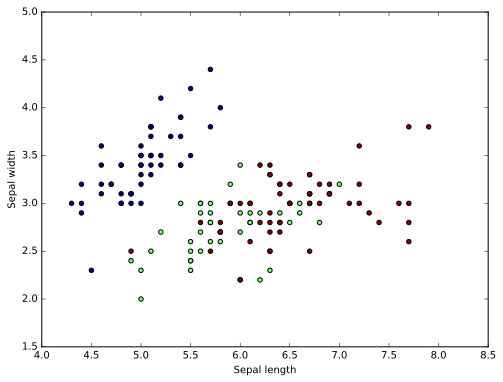

In [8]:
iris = datasets.load_iris()

plt.figure(2, figsize=(8, 6))

plt.xlabel('Sepal length')

plt.ylabel('Sepal width')

X = iris.data
Y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=Y)


### 3D Plotting

![Azimuth and Elevation](chview3.gif)

Illustration from [mathworks](www.mathworks.com/help/matlab/visualize/setting-the-viewpoint-with-azimuth-and-elevation.html).

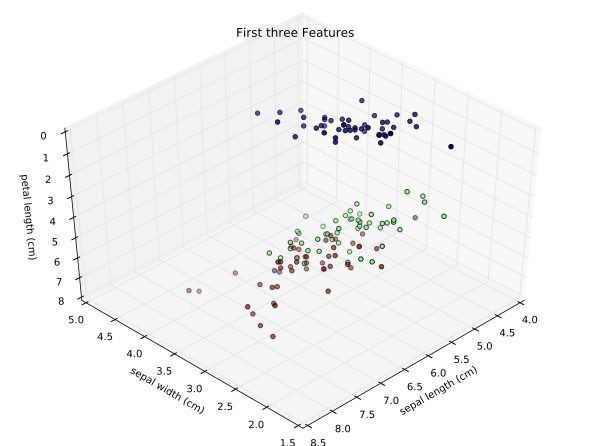

In [20]:
# mplot3d : Matplotlib toolkit that provides basic 3d plotting
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))

# azim : the azimuth angle in the x,y plane
# elev : the elevation angle above (or below) the x,y plane
ax = Axes3D(fig, elev=-135, azim=135)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y)

ax.set_title("First three Features")

ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])

### Data binning

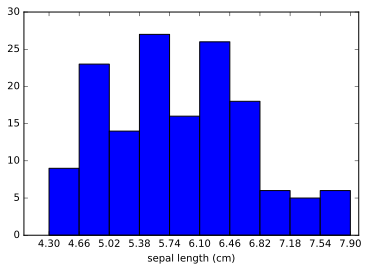

In [32]:
n, bins, patches = plt.hist(X[:,0], bins=10)
plt.xticks(bins)
plt.xlabel(iris.feature_names[0])

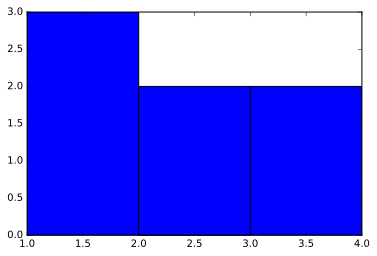

In [36]:
hist = plt.hist([1,1,1,2,2,4,4], bins=3)

## Dependency-oriented data

Relationships between data items :

* **Time-Series** : data generated by continouous measurement over time
    * *environmental sensor* : temperature, pressure
    * *finantial market analysis*
* **Discrete Sequences**
    * *event logs* such as web accesses : Client IP, Web page address
    * *strings*
* **Spatial** : non-spatial attributes measured at spatial locations
    * *hurricane forecasting* : sea-surface temperature, pressure
* **Spatiotemporal**
* **Network and Graph Data**
    * *Web graph*
    * *Social networks*



## Text Data

* A **string** : a discrete sequence of characters
* **Vector-space representation** : words (terms) frequencies (normalized with respect to the document length)
    * **Document-term matrix** : $n$ documents $\times$ $d$ terms

In [9]:
# See : http://scikit-learn.org/stable/modules/feature_extraction.html
# and and http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer : Convert a collection of text documents to a matrix of token counts
vectorizer = CountVectorizer()

corpus = ['This is the first document.',
          'This is the second second document.',
          'And the third one.',
          'Is this the first document?']

# Learn the vocabulary dictionary and return term-document matrix.
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
X.toarray()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

## Graph Data

A graph $G = (V, E)$ with $n$ ***vertices*** and $m$ ***edges*** consists of:

* $V = V(G)$ : a vertex set; $n = |V|$ is the order of $G$
* $E = E(G)$ : a set of pairs of vertices, called edges; $m = |E|$

A ***weighted graph*** is a graph $G = (V, E)$ in which each edge $e \in E(G)$ is given a numerical weight $w(e)$, where $w : E \rightarrow \mathbb{R}$.

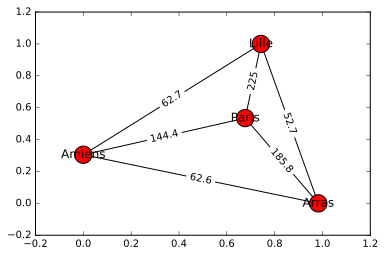

In [31]:
import networkx as nx
    
def draw_weighted_graph(g):
    pos = nx.spectral_layout(g)
    nx.draw_networkx(g, pos)
    edge_labels = {edge[0:2]: edge[2]['weight'] for edge in g.edges(data=True)}
    nx.draw_networkx_edge_labels(g, pos, edge_labels)

g = nx.Graph()
    
g.add_nodes_from(['Lille', 'Paris', 'Amiens', 'Arras'])
g.add_edge('Lille', 'Paris', weight=225)
g.add_edge('Lille', 'Amiens', weight=62.7)
g.add_edge('Lille', 'Arras', weight=52.7)
g.add_edge('Paris', 'Amiens', weight=144.4)
g.add_edge('Paris', 'Arras', weight=185.8)
g.add_edge('Amiens', 'Arras', weight=62.6)

draw_weighted_graph(g)